<a href="https://colab.research.google.com/github/SrishtiK1112/Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of the project is to predict fraudulent credit card transactions using machine learning models.This analysis and prediction is important for a bank as each fraud trancastion is a loss of the bank as well as customer faith. The dataset contains transactions made by credit cardholders. The dataset is highly imbalanced as the percentage of positive fraud class is very less

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading datasets

In [89]:
train_df = pd.read_csv(r'/content/creditcard.csv')
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
train_df.shape

(284807, 31)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [92]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Handling null values

In [93]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we can see that there are no null values in the dataset
Checking the distribution of positive and nagetive classes

In [94]:
classes = train_df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [95]:
original_transaction = round((classes[0]/train_df['Class'].count()*100),2)
original_transaction

99.83

In [96]:
fraud_transaction = round((classes[1]/train_df['Class'].count()*100),2)
fraud_transaction

0.17

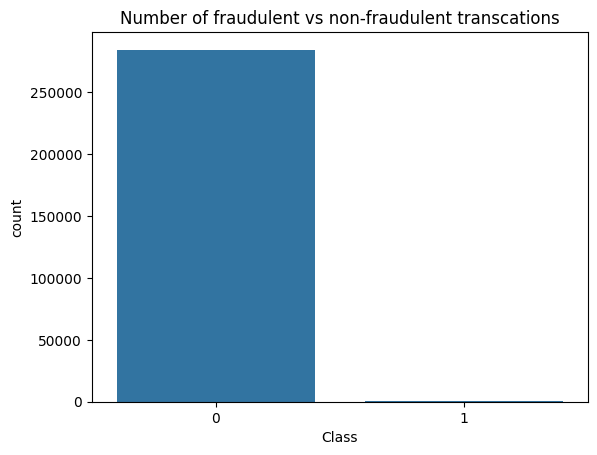

In [97]:
sns.countplot(x='Class', data=train_df)   # Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

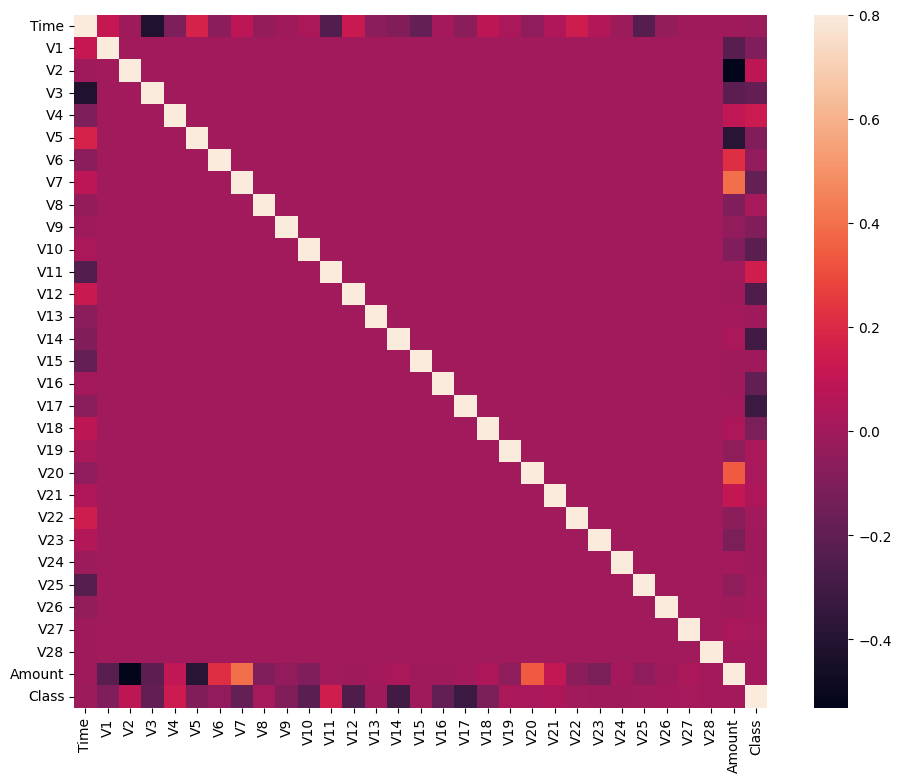

In [98]:
cormat=train_df.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax = .8 ,square=True)
plt.show()

Observing the distribution of classes with 'time' feature

In [99]:
fraud_data = train_df[train_df['Class'] == 1]

authentic_data = train_df[train_df['Class'] == 0]

<ipython-input-100-a8b4c6fd54ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fraud_data['Time'],label='fraudulent',hist=False)
<ipython-input-100-a8b4c6fd54ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=Fal

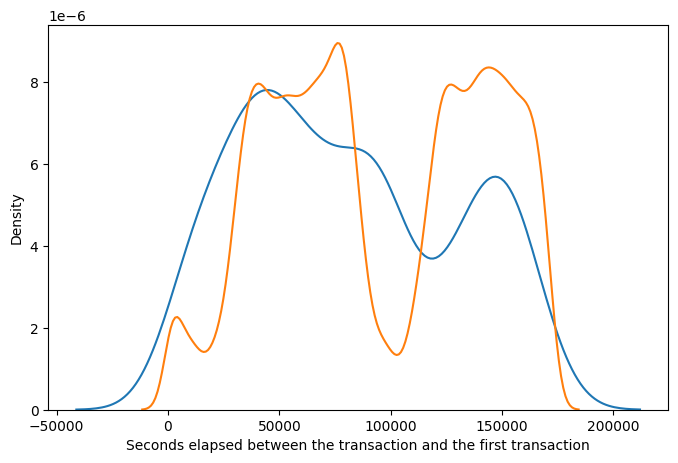

In [100]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Time'],label='fraudulent',hist=False)
ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.show()


Since there is no specific pattern of distribution with time, therefore this feature can be dropped

In [101]:
train_df.drop('Time', axis=1, inplace=True)

Observe the distribution of classes with 'amount' feature

<ipython-input-102-35e461b375f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fraud_data['Amount'],label='fraudulent',hist=False)
<ipython-input-102-35e461b375f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=F

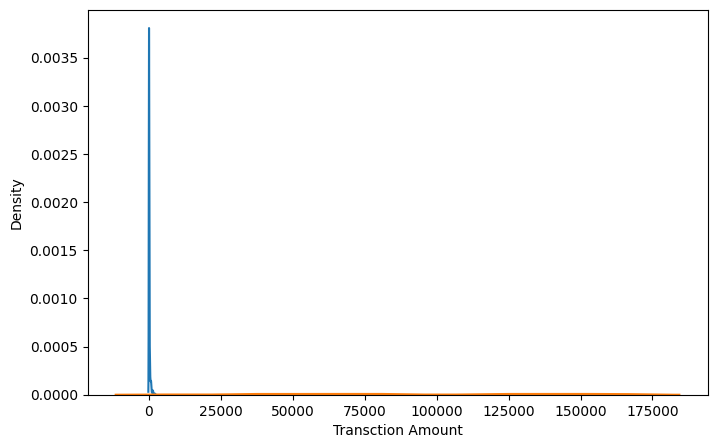

In [102]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Splitting the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = train_df.drop(['Class'], axis=1)
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [105]:
y = train_df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [107]:
X_train.shape

(227845, 29)

In [108]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,0.77
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,36.14
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,179.95
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,181.06
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,8.20


In [109]:
y_train.shape

(227845,)

In [110]:
y_test.head()

49089     0
154704    0
67247     0
251657    0
201903    0
Name: Class, dtype: int64

Analysis - The fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

Feature Scaling the 'Amount' column using Label Encoding

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,-0.711190,0.439833,0.963645,-1.558006,-0.849632,0.856514,-2.359232,-4.103076,-1.221692,-0.180773,...,0.467513,0.526395,0.555138,-0.715453,-0.339993,1.481497,0.221045,0.134007,0.163621,-0.152428
65615,-2.720797,-2.019693,0.555552,-1.214493,1.091755,-1.048706,-0.732389,0.670327,-1.697393,0.096623,...,-0.532981,-0.510275,-1.524682,0.777497,-0.343277,-0.660123,0.474666,-0.176144,-0.027094,-0.213504
253799,-1.825901,-0.539605,-0.263009,0.516277,-0.432071,0.097944,3.833402,-0.428094,-1.583814,-1.073811,...,1.260578,0.584132,0.544474,0.789313,0.017179,1.626030,-0.308673,-0.237096,0.072098,2.161475
210755,-0.360815,0.942995,0.256998,0.385238,0.606772,-0.806142,0.943830,-0.286445,0.049832,-0.082140,...,-0.389773,0.272937,0.861662,-0.125325,-0.021665,0.011629,-0.565085,-0.283593,0.017381,-0.340485


In [114]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


Dealing with Skewness

Skewness is a quantifiable measure of how distorted a data sample is from the normal distribution. Any form of skewness is undesirable, since it leads to excessively large variance in estimates.

In [115]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

<ipython-input-116-19cec7068e90>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[col])
<ipython-input-116-19cec7068e90>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[col])
<ipython-input-116-19cec7068e90>:6: UserWarning: 

`distplot` is a deprecated function and will be rem

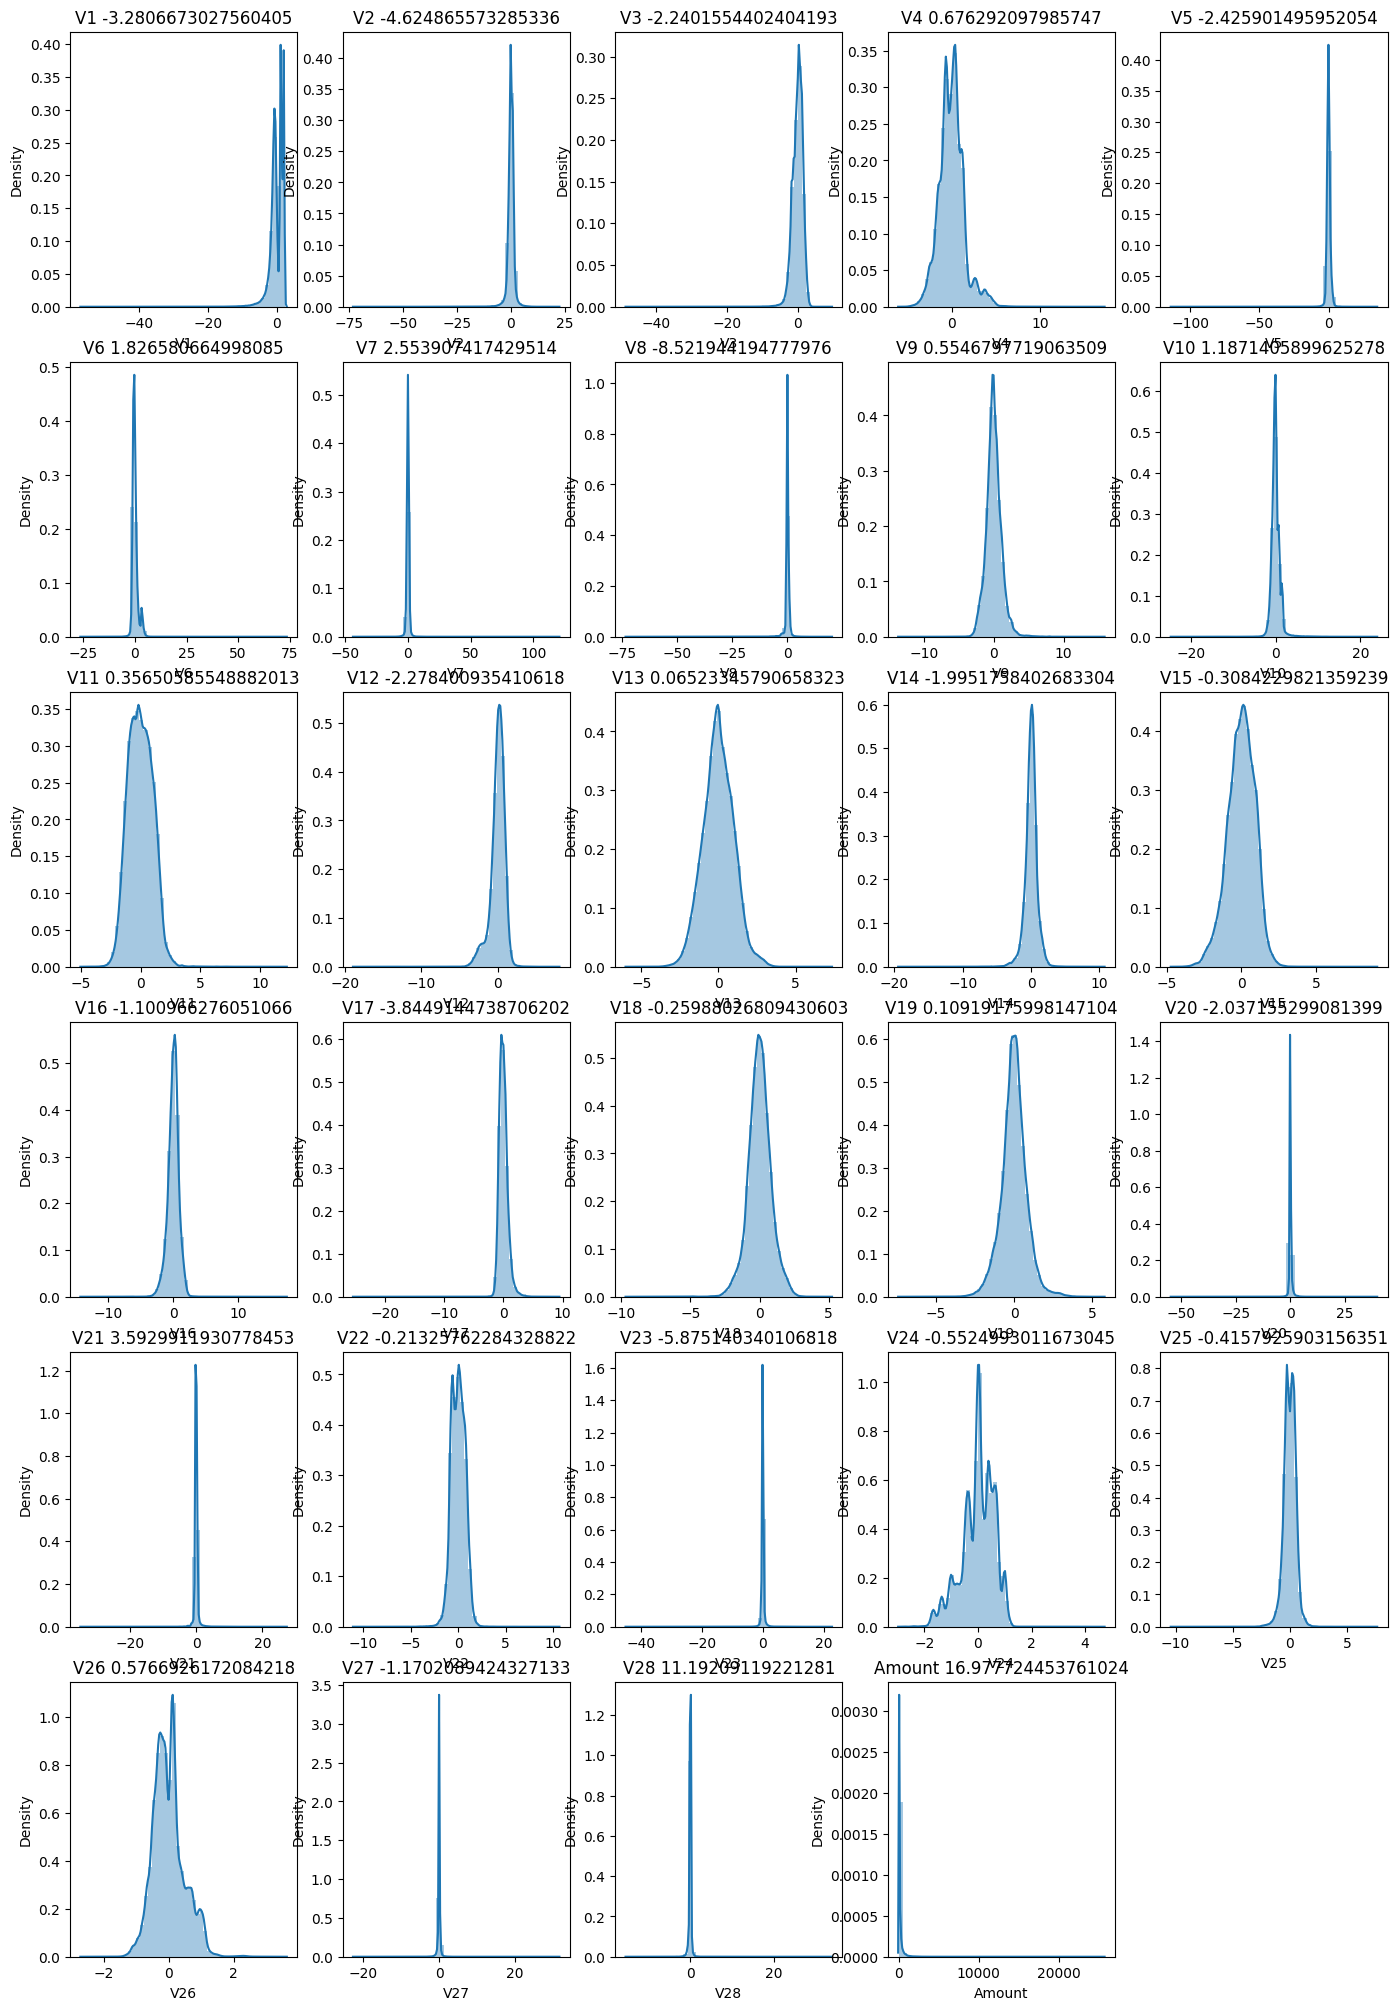

In [116]:
k=0
plt.figure(figsize=(17,25))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(train_df[col])
    plt.title(col+' '+str(train_df[col].skew()))

Here we will be using the Power Transformer module of sklearn to change the distribution of the data

In [117]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

<ipython-input-118-c75ff853b0db>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-118-c75ff853b0db>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-118-c75ff853b0db>:6: UserWarning: 

`distplot` is a deprecated function and will be remov

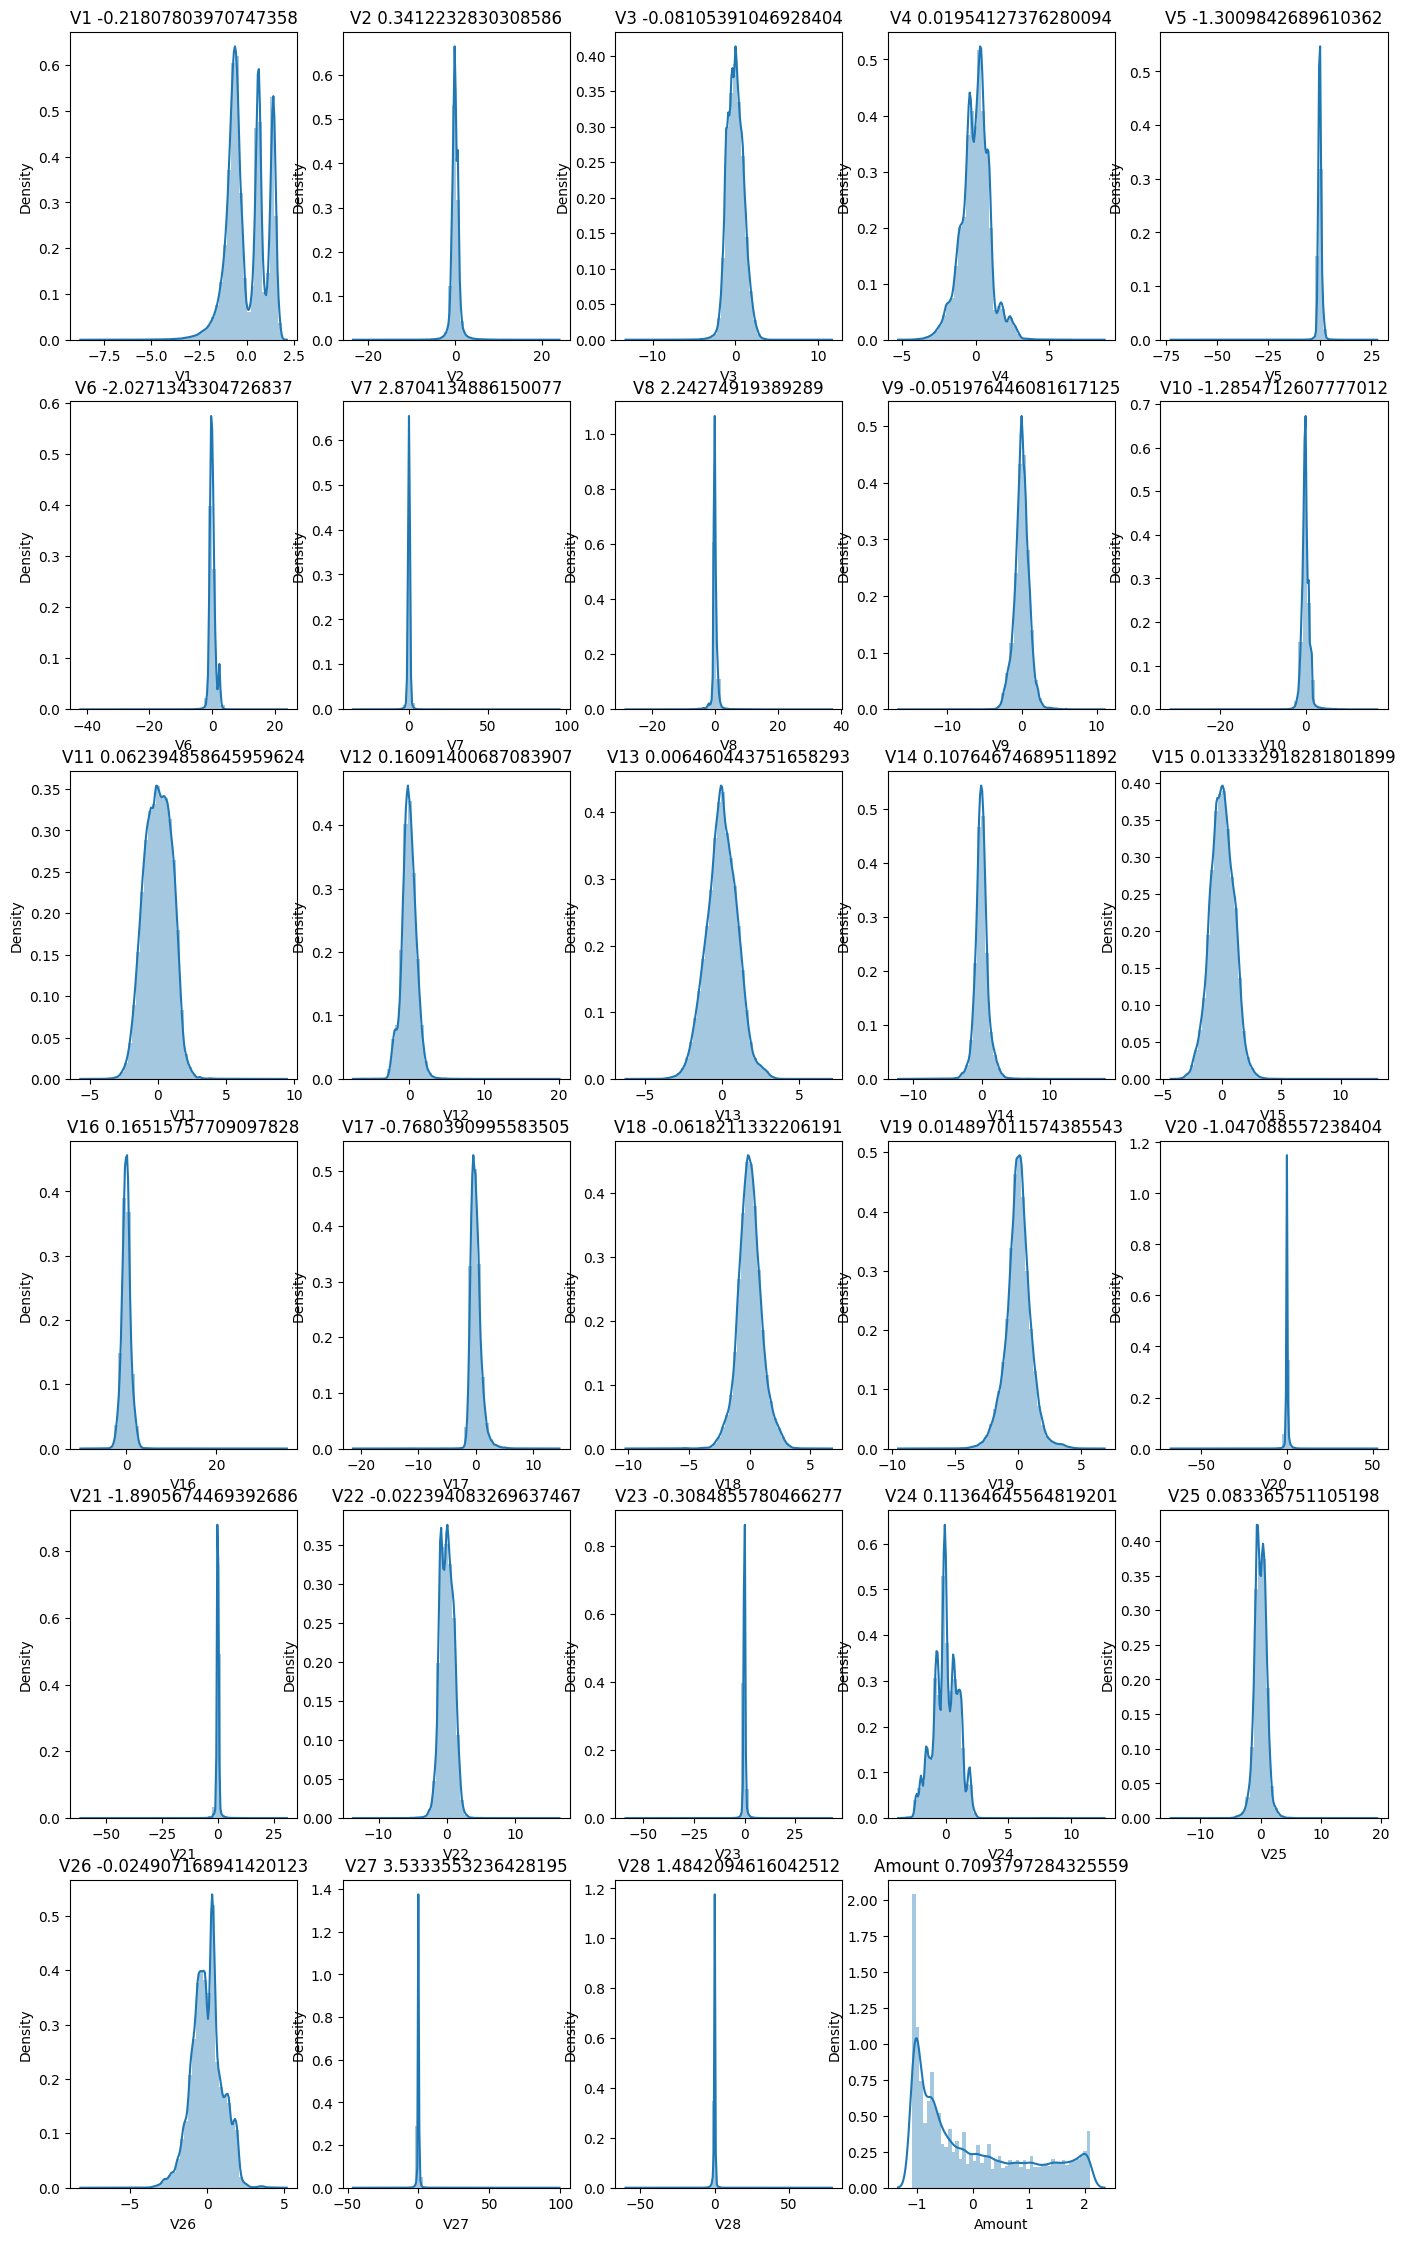

In [118]:
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [119]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,1.414341,-0.352037,-0.599219,-0.067550,-0.129205,0.326372,-0.541033,0.115625,1.025773,0.005709,...,-0.223245,-0.256588,-0.668354,0.543815,0.000923,-0.840953,-0.574979,-0.011227,-0.133703,-1.047231
179369,-0.343333,0.427569,0.256780,0.679871,0.243257,0.179406,0.503851,-0.125500,-0.649147,0.314539,...,0.263948,-0.156535,-0.378679,-0.188657,-0.776852,-0.981064,1.417840,-0.026888,0.459515,0.003533
73138,-1.474262,-1.175561,0.855950,0.569615,0.787904,-0.049687,-0.370444,0.923863,-0.529840,-0.907168,...,1.087460,0.396218,-0.454678,0.334451,-0.530882,0.437817,0.722656,-0.260684,-1.137282,1.580107
208679,1.241902,-0.686705,-1.042562,-0.081862,-0.419771,-1.002720,0.200703,-0.572151,-0.729926,0.745982,...,-0.255596,-0.557964,-1.230034,0.211300,0.029927,-0.499203,0.970393,-0.244245,-0.085740,1.584494
206534,1.636001,-0.424955,-1.004673,-0.627617,-0.300834,-1.209461,-0.095084,-0.493504,-0.633904,0.803305,...,-0.061150,0.087590,0.156477,0.338766,-0.233768,-0.160767,-0.599292,-0.117488,-0.186304,-0.791028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,-0.629084,0.214176,0.615004,-1.151621,-0.619547,0.727173,-1.898263,-3.085415,-1.145886,-0.129756,...,0.601080,0.736453,0.761310,-1.139853,-0.638310,3.124784,0.539173,0.324360,0.512942,0.309175
65615,-1.382569,-1.226421,0.266853,-0.864237,0.789267,-0.822236,-0.587450,0.634832,-1.644831,0.130868,...,-0.687451,-0.706989,-2.049155,1.271053,-0.643206,-1.248357,1.003895,-0.446251,-0.072121,-0.040323
253799,-1.080496,-0.417911,-0.335120,0.434676,-0.322521,0.186123,3.066862,-0.474847,-1.524427,-1.017297,...,1.630173,0.813850,0.746142,1.290916,-0.071073,3.458240,-0.602887,-0.595452,0.233604,2.043873
210755,-0.458810,0.580650,0.030901,0.346849,0.430919,-0.591137,0.757867,-0.347855,0.100208,-0.036084,...,-0.503775,0.393526,1.200123,-0.212248,-0.136562,-0.015481,-1.246695,-0.708830,0.065359,-1.003747


Handling Imbalance data with different approaches

- Undersampling: Here for balancing the class distribution, the non-fraudulent transctions class count will be reduced to that of fraudulent transctions so that both classes count are same (396)

- Oversampling: Here we will make the same count of non-fraudulent transctions as fraudulent transctions. This is basically the opposite of undersampling and here the lower class counts is maximized to the highest class counts to make the classes equal.

- SMOTE (Synthetic Minority Oversampling Technique): Here synthetic samples will be created by doing unsampling using Synthetic Minority Oversampling Technique

Metric evaluation for Imbalanced data in this dataset

Since the data is highly imbalanced the accuracy of every model will easily become 99% as majority of the datapoints return to a particular class(real transaction). Therefore here we will be using the ROC-AUC score to evaluate all the models. The ROC(Receiver Operator Characteristic) curve is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [226]:
train_df = pd.read_csv(r'/content/creditcard.csv')
print("Number of rows ", len(train_df.index))
train_df.head()

Number of rows  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X = train_df.drop(['Class'], axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [229]:
y = train_df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [231]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

1. SMOTE (Synthetic Minority Oversampling Technique)

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
sm = SMOTE(random_state=27)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [234]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 30)
After SMOTE oversampling X_train shape= (454898, 30)


Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression

In [238]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [240]:

folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [241]:
scores = pd.DataFrame(model_cv.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.772662,1.835009,0.066814,0.017430,0.01,{'C': 0.01},0.996512,0.994471,0.986445,0.996253,...,0.993616,0.003691,2,0.996215,0.994484,0.987098,0.996387,0.994409,0.993719,0.003413
1,5.745287,1.153550,0.081155,0.027021,0.1,{'C': 0.1},0.995374,0.996207,0.986521,0.994257,...,0.993360,0.003490,3,0.994996,0.996384,0.987171,0.994593,0.994452,0.993519,0.003247
2,6.249556,2.222431,0.059044,0.001468,1,{'C': 1},0.996676,0.995803,0.986529,0.996301,...,0.993919,0.003784,1,0.996406,0.996001,0.987178,0.996436,0.994223,0.994049,0.003530
3,5.430447,1.863822,0.059413,0.001995,10,{'C': 10},0.994839,0.994520,0.986529,0.996293,...,0.993325,0.003463,4,0.994389,0.994530,0.987179,0.996422,0.994457,0.993395,0.003200
4,5.259574,1.424978,0.069264,0.024150,100,{'C': 100},0.996575,0.994520,0.986529,0.994262,...,0.993266,0.003472,5,0.996259,0.994530,0.987179,0.994599,0.994457,0.993405,0.003185
5,5.387354,1.682168,0.059036,0.002564,1000,{'C': 1000},0.995930,0.994520,0.986529,0.994262,...,0.993137,0.003357,6,0.995642,0.994530,0.987179,0.994599,0.994457,0.993281,0.003082


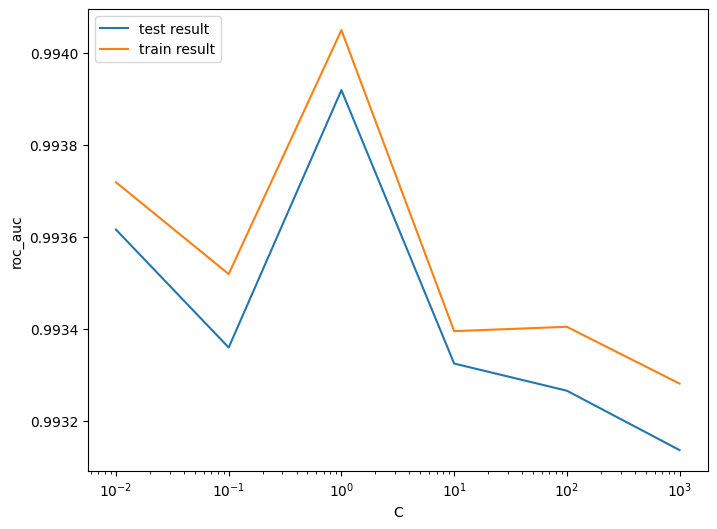

In [242]:
plt.figure(figsize=(8, 6))
plt.plot(scores['param_C'], scores['mean_test_score'])
plt.plot(scores['param_C'], scores['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [244]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9939187168124128 at C = 1


In [245]:
logistic_smote = LogisticRegression(C=0.1)

In [246]:
logistic_smote_model = logistic_smote.fit(X_train_smote, y_train_smote)

In [247]:
y_train_preds = logistic_smote_model.predict(X_train_smote)

In [248]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_smote, y_train_preds)
print(confusion)

[[223301   4148]
 [  7011 220438]]


In [249]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [250]:
from sklearn.metrics import f1_score

print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train_smote, y_train_preds))

Accuracy:- 0.9754692260682615
Sensitivity:- 0.9691755074764014
Specificity:- 0.9817629446601216
F1-Score:- 0.975313858440165


In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_train_smote, y_train_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    227449
           1       0.98      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



In [252]:
y_train_pred_probs = logistic_smote_model.predict_proba(X_train_smote)[:,1]

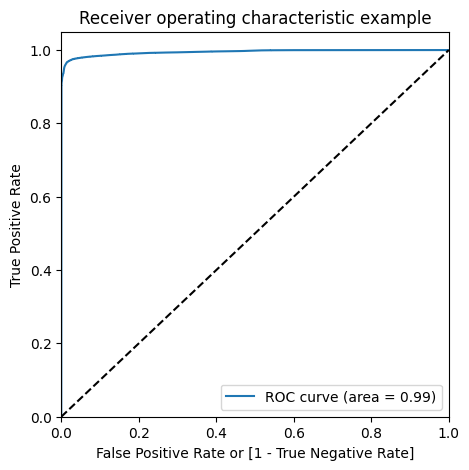

In [253]:
draw_roc(y_train_smote, y_train_pred_probs)

ROC Training score - 99%

In [254]:
y_test_preds = logistic_smote_model.predict(X_test)

In [255]:
confusion = metrics.confusion_matrix(y_test, y_test_preds)
print(confusion)

[[55755  1111]
 [   15    81]]


In [256]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [257]:
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_test, y_test_preds))

Accuracy:- 0.9802324356588603
Sensitivity:- 0.84375
Specificity:- 0.9804628424717757
F1-Score:- 0.12577639751552794


In [258]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.84      0.13        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [259]:
y_test_pred_probs = logistic_smote_model.predict_proba(X_test)[:,1]

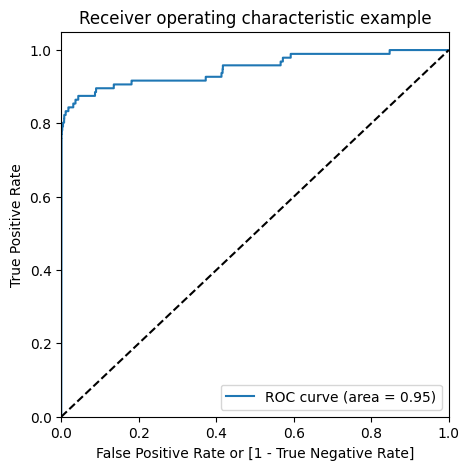

In [260]:
draw_roc(y_test, y_test_pred_probs)

ROC Testing score - 95%

XGBoost

In [261]:
from xgboost import XGBClassifier

In [262]:
folds = 3

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [263]:
scores = pd.DataFrame(model_cv.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.132666,1.224453,0.318616,0.075444,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999896,0.999915,0.999904,0.999905,0.000008,6,0.999925,0.999920,0.999922,0.999923,2.216731e-06
1,9.408449,2.213646,0.344655,0.105857,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999900,0.999913,0.999909,0.999907,0.000006,4,0.999922,0.999924,0.999926,0.999924,1.606227e-06
2,7.839989,1.653629,0.269771,0.009089,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999906,0.999913,0.999902,0.999907,0.000005,5,0.999922,0.999921,0.999915,0.999919,2.866664e-06
3,8.562305,1.387605,0.265273,0.008295,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999969,0.999986,0.999973,0.999976,0.000007,3,0.999994,0.999990,0.999994,0.999993,2.042303e-06
4,8.878385,1.490311,0.267065,0.013862,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999981,0.999986,0.999975,0.999981,0.000005,1,0.999995,0.999996,0.999997,0.999996,6.664737e-07
5,8.225203,1.265876,0.359367,0.135244,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999979,0.999975,0.999981,0.999978,0.000003,2,0.999996,0.999991,0.999996,0.999995,2.384644e-06


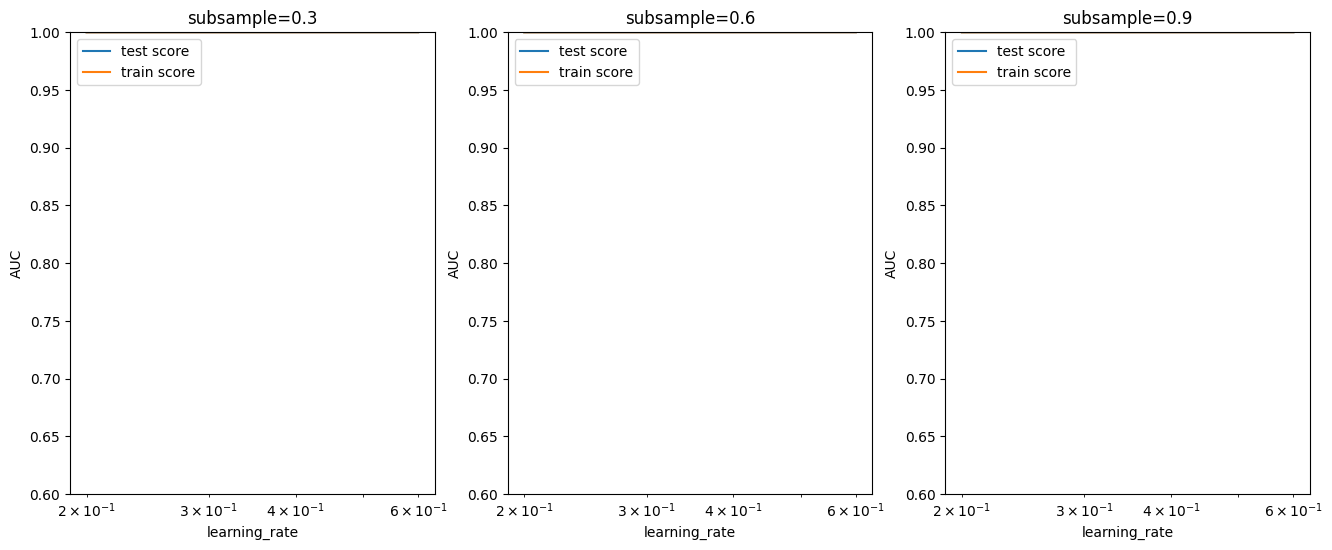

In [264]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = scores[scores['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [265]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [266]:
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:15:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [267]:
y_train_preds = xgb_smote_model.predict(X_train_smote)

In [268]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_preds)
print(confusion)

[[227449      0]
 [     0 227449]]


In [269]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [270]:
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train_smote, y_train_preds))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [271]:
print(classification_report(y_train_smote, y_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [272]:
y_train_pred_probs = xgb_smote_model.predict_proba(X_train_smote)[:,1]

In [273]:
roc = metrics.roc_auc_score(y_train_smote, y_train_pred_probs)
roc

1.0

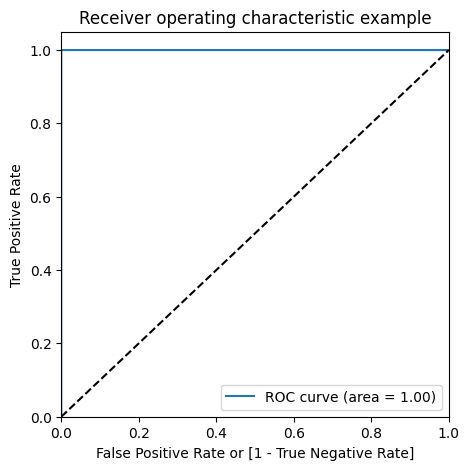

In [274]:
draw_roc(y_train_smote, y_train_pred_probs)

ROC Testing Score - 100%

In [275]:
y_test_preds = xgb_smote_model.predict(X_test)

In [276]:
confusion = metrics.confusion_matrix(y_test, y_test_preds)
print(confusion)

[[56848    18]
 [   20    76]]


In [277]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [278]:
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_test, y_test_preds))

Accuracy:- 0.9993328885923949
Sensitivity:- 0.7916666666666666
Specificity:- 0.9996834663946822
F1-Score:- 0.7999999999999999


In [279]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.79      0.80        96

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [280]:
y_test_pred_probs = xgb_smote_model.predict_proba(X_test)[:,1]

In [281]:
roc = metrics.roc_auc_score(y_test, y_test_pred_probs)
roc

0.9711795053283157

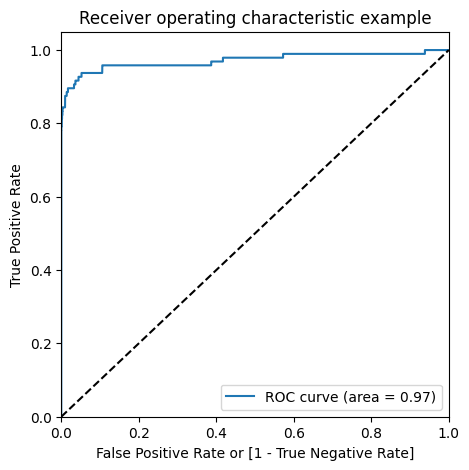

In [282]:
draw_roc(y_test, y_test_pred_probs)

ROC Testing Score - 97%